## Scikit-learn / ML attempts

Specifically:
* **Classification** of **genre** based on numerical data, gender, ...
* **Classification** of **gender** based on numerical data, genre, ... - watch out, very unbalanced
* **Classification** of **artist** based on numerical data, gendre, gender?, ...
* **Classification** of **genre** for groupby mean data
* **Regression** of **unique_words, total_words, topic count** etc
* Same things for decade data except no gender and decade classification instead of genre 

In [1]:
import pandas as pd
import numpy as np
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# regression metrics

# For splitting of data into train and test set
from sklearn.model_selection import train_test_split
# for categorical columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# regression
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Paths below need updating

In [2]:
counts_df = pd.read_csv('./dataframes/with_counts/combined_count.csv', index_col = 0)
genre_mean_df = pd.read_csv('./dataframes/group_stats/genre_mean_df.csv', index_col = 0)
artist_genre_mean_df = pd.read_csv('./dataframes/group_stats/mean/combined_artists.csv', index_col = 0)
decades_counts_df = pd.read_csv('./decade_dataframes/decades_counts.csv', index_col = 0)
decades_mean_df = pd.read_csv('./decade_dataframes/decade_groupby_mean.csv', index_col = 0)

In [3]:
counts_df.head()

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,emotion
0,Aaliyah,Are You That Somebody?,Are You That Somebody? by Aaliyah (Ft. Timbaland),1998-05-26,1998.0,5.0,26.0,373960,https://genius.com/Aaliyah-are-you-that-somebo...,1,...,5,5,4,26,14,1,1,1,1,sadness
1,Aaliyah,Enough Said,Enough Said by Aaliyah (Ft. Drake),2012-08-05,2012.0,8.0,5.0,316333,https://genius.com/Aaliyah-enough-said-lyrics,1,...,5,5,4,26,14,1,1,1,1,anger
2,Aaliyah,At Your Best (You Are Love),At Your Best (You Are Love) by Aaliyah,1994-08-22,1994.0,8.0,22.0,285549,https://genius.com/Aaliyah-at-your-best-you-ar...,0,...,5,5,4,26,14,1,1,1,1,sadness
3,Aaliyah,Miss You,Miss You by Aaliyah,2002-11-16,2002.0,11.0,16.0,245608,https://genius.com/Aaliyah-miss-you-lyrics,0,...,5,5,4,26,14,1,1,1,1,sadness
4,Aaliyah,Age Ain’t Nothing But a Number,Age Ain't Nothing But a Number by Aaliyah,1994-12-06,1994.0,12.0,6.0,207419,https://genius.com/Aaliyah-age-aint-nothing-bu...,0,...,5,5,4,26,14,1,1,1,1,joy


In [4]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Artist                        800 non-null    object 
 1   Song Title                    800 non-null    object 
 2   Full Title                    800 non-null    object 
 3   Release Date                  686 non-null    object 
 4   Year                          794 non-null    float64
 5   Month                         751 non-null    float64
 6   Day                           686 non-null    float64
 7   Pageviews                     800 non-null    int64  
 8   url                           800 non-null    object 
 9   featured_count                800 non-null    int64  
 10  producer_count                800 non-null    int64  
 11  writer_count                  800 non-null    int64  
 12  Song Lyrics                   800 non-null    object 
 13  Artist Ima

In [5]:
counts_df.columns

Index(['Artist', 'Song Title', 'Full Title', 'Release Date', 'Year', 'Month',
       'Day', 'Pageviews', 'url', 'featured_count', 'producer_count',
       'writer_count', 'Song Lyrics', 'Artist Image', 'gender', 'genre',
       'unique_words', 'total_words', 'manual_love_count',
       'manual_money_count', 'manual_violence_count', 'manual_drugs_count',
       'manual_gendered_count', 'manual_sadness_count', 'manual_joy_count',
       'manual_yes_count', 'manual_no_count', 'manual_love_word_percent',
       'manual_money_word_percent', 'manual_violence_word_percent',
       'manual_drugs_word_percent', 'manual_gendered_word_percent',
       'manual_sadness_word_percent', 'manual_joy_word_percent',
       'manual_yes_word_percent', 'manual_no_word_percent', 'sentiment', 'CC',
       'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN',
       'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS',
       'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'V

### Select columns suitable for our ML tasks

#### check for NaNs

In [6]:
counts_df.isna().sum().sort_values(ascending=False)

Release Date               114
Day                        114
Month                       49
Year                         6
Artist                       0
                          ... 
manual_joy_word_percent      0
manual_yes_word_percent      0
manual_no_word_percent       0
Song Title                   0
emotion                      0
Length: 73, dtype: int64

#### should we drop the rows with nulls or not?
* month and day most likely provide little value
* year could be usedful though, lets try dropping rows with null year
* a better option could be to impute the year based on the artist or even manually fix these by checking the release dates

In [7]:
counts_classif_cols = ['Year',
                      'Pageviews', 'featured_count', 'producer_count', 'writer_count',
                      'gender', 'genre', 'unique_words', 'total_words', 
                       'manual_love_count',
                       'manual_money_count', 'manual_violence_count', 'manual_drugs_count',
                       'manual_gendered_count', 'manual_sadness_count', 'manual_joy_count',
                       'manual_yes_count', 'manual_no_count',
                       'sentiment', 'emotion'
                      ]
counts_classif_cols_no_gender = [col for col in counts_classif_cols if col != 'gender']
counts_classif_cols_no_genre = [col for col in counts_classif_cols if col != 'genre']
counts_classif_cols_no_sentiment = [col for col in counts_classif_cols if col != 'sentiment']
counts_classif_cols_no_emotion = [col for col in counts_classif_cols if col != 'emotion']

In [8]:
classif_counts_df = counts_df[[*counts_classif_cols]]

#### dropna

In [9]:
classif_counts_df.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14724\988449719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classif_counts_df.dropna(inplace=True)


In [10]:
classif_counts_df.shape

(794, 20)

In [38]:
def train_classify_target(df, target_col, model, train_size=0.8, task='class'):
    """
    Takes a dataframe, target column and model,
    plus optionally train_size and tak
    
    if task set to 'class' will calculate classification metrics
    if task set to 'regr' will calculate regression metrics!
    
    creates a train-test split,
    preprocesses the (standard scaling and one-hot-encoding) pipeline,
    calculates accuracy, f1, confusion matrix metrics,
    returns the trained model and metrics

    Caveats:
        * Expects a df without NaNs, you have to choose columns / rows to drop / keep first
        * The pipeline could be expanded

    To be expanded:
        * right now takes model, could possibly take model_type and hyperparams
    
    """
    y = df[target_col]
    X = df.drop([target_col], axis=1)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=train_size, test_size=(1-train_size))

    categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
    numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

    # Preprocessing transformers
    numerical_transformer = StandardScaler()
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ])

    # combined preprocessor
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Bundle preprocessing and modeling code in a pipeline
    train_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Preprocessing of training data, fit model 
    train_pipeline.fit(X_train, y_train)

    # Preprocessing of validation data, get predictions
    preds = train_pipeline.predict(X_valid)

    # metrics
    if task == 'class':
        acc = accuracy_score(y_valid, preds)
        f1 = f1_score(y_valid, preds, average=None, labels=model.classes_)
        cm = confusion_matrix(y_valid, preds, labels=model.classes_)
        labels = model.classes_

        return acc, f1, cm, labels, model, preds, X_valid, y_valid, train_pipeline

    if task == 'regr':
        mae = mean_absolute_error(y_valid, preds)
        r2 = r2_score(y_valid, preds)
        return mae, r2, model

In [19]:
def display_confusion_matrix(cm, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels=labels
                             )
    disp_plot = disp.plot()
    plt.show()

## Classify for genre

### by counts_df
classif_counts_df, SVC, target='genre'

In [27]:
model = SVC()

In [39]:
acc, f1, cm, labels, model, preds, X_test, y_test, train_pipeline = train_classify_target(
    df = classif_counts_df,
    target_col = 'genre',
    model = model
)

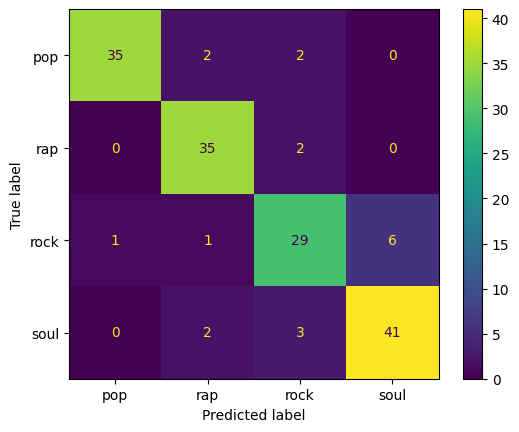

In [23]:
display_confusion_matrix(cm, labels)

In [24]:
print(acc)
print(f1)

0.8805031446540881
[0.93333333 0.90909091 0.79452055 0.88172043]


In [44]:
test_index = X_test.head(1).index

In [53]:
counts_df.columns

Index(['Artist', 'Song Title', 'Full Title', 'Release Date', 'Year', 'Month',
       'Day', 'Pageviews', 'url', 'featured_count', 'producer_count',
       'writer_count', 'Song Lyrics', 'Artist Image', 'gender', 'genre',
       'unique_words', 'total_words', 'manual_love_count',
       'manual_money_count', 'manual_violence_count', 'manual_drugs_count',
       'manual_gendered_count', 'manual_sadness_count', 'manual_joy_count',
       'manual_yes_count', 'manual_no_count', 'manual_love_word_percent',
       'manual_money_word_percent', 'manual_violence_word_percent',
       'manual_drugs_word_percent', 'manual_gendered_word_percent',
       'manual_sadness_word_percent', 'manual_joy_word_percent',
       'manual_yes_word_percent', 'manual_no_word_percent', 'sentiment', 'CC',
       'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN',
       'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS',
       'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'V

In [59]:
print(counts_df.loc[test_index, ['Artist', 'Song Title', 'Song Lyrics', 'genre']])
print(X_test.loc[test_index, :])
prediction = train_pipeline.predict(X_test.loc[test_index, :])
print(prediction)

       Artist Song Title                                        Song Lyrics  \
109  Dua Lipa   Homesick   here where the skys falling im covered in blu...   

    genre  
109   pop  
       Year  Pageviews  featured_count  producer_count  writer_count  gender  \
109  2017.0     426137               0               1             2  female   

     unique_words  total_words  manual_love_count  manual_money_count  \
109            78          301                  2                   0   

     manual_violence_count  manual_drugs_count  manual_gendered_count  \
109                      0                   0                     32   

     manual_sadness_count  manual_joy_count  manual_yes_count  \
109                     3                 0                 0   

     manual_no_count sentiment emotion  
109               23  Positive    love  
['pop']


### Classify for gender

In [ ]:
model = SVC()
acc, f1, cm, labels, trained_model = train_classify_target(
    df = classif_counts_df,
    target_col = 'gender',
    model = model
)
display_confusion_matrix(cm, labels)
print(acc)
print(f1)

### Classify for sentiment

In [ ]:
model = SVC()
acc, f1, cm, labels, trained_model = train_classify_target(
    df = classif_counts_df,
    target_col = 'sentiment',
    model = model
)
display_confusion_matrix(cm, labels)
print(acc)
print(f1)

### Classify for emotion

In [ ]:
model = SVC()
acc, f1, cm, labels, trained_model = train_classify_target(
    df = classif_counts_df,
    target_col = 'emotion',
    model = model
)
display_confusion_matrix(cm, labels)
print(acc)
print(f1)

### Classify for artist

In [ ]:
counts_classif_cols_artist  = [*counts_classif_cols, 'Artist']
counts_classif_cols_artist

In [ ]:
classif_counts_artist_df = counts_df[[*counts_classif_cols_artist]]
classif_counts_artist_df.dropna(inplace=True)

In [ ]:
model = SVC()
acc, f1, cm, labels, trained_model = train_classify_target(
    df = classif_counts_artist_df,
    target_col = 'Artist',
    model = model
)
display_confusion_matrix(cm, labels)
print(acc)
print(f1)

### classify genre from groupby mean data
hold on though - it has to be artist means, if you just get genre means, thats 4 rows of data

In [ ]:
# genre_mean_df.head().columns

In [ ]:
# genre_mean_df['genre'] = genre_mean_df.index

In [ ]:
artist_genre_mean_df.columns

In [ ]:
no_artist_genre_mean_df = artist_genre_mean_df.drop(['Artist'], axis=1)

In [ ]:
model = SVC()
acc, f1, cm, labels, trained_model = train_classify_target(
    df = no_artist_genre_mean_df,
    target_col = 'genre',
    model = model
)
display_confusion_matrix(cm, labels)
print(acc)
print(f1)

### classify for decade from decades counts df

In [ ]:
decades_counts_df.columns

In [ ]:
decades_classif_cols = [
    'Year',
    'Pageviews',
    'featured_count', 'producer_count', 'writer_count',
    'unique_words', 'total_words',
    'manual_love_count', 'manual_swears_count',
   'manual_money_count', 'manual_violence_count', 'manual_drugs_count',
   'manual_gendered_count', 'manual_sadness_count', 'manual_joy_count',
   'manual_yes_count', 'manual_no_count', 'decade', 'sentiment'
]

In [ ]:
decades_classif_df = decades_counts_df[[*decades_classif_cols]]

In [ ]:
decades_classif_df.isna().sum().sort_values(ascending=False)

In [ ]:
decades_classif_df.dropna(inplace=True)

In [ ]:
decades_classif_df.shape

In [ ]:
model = SVC()
acc, f1, cm, labels, trained_model = train_classify_target(
    df = decades_classif_df,
    target_col = 'decade',
    model = model
)
display_confusion_matrix(cm, labels)
print(acc)
print(f1)

## Regression

### regress for unique_words on counts

In [ ]:
model = SVR()
mae, r2, trained_model = train_classify_target(
    df = classif_counts_df,
    target_col = 'unique_words',
    model = model,
    task = 'regr'
)
# display_confusion_matrix(cm, labels)
print(mae)
print(r2)

### regress for manual_love_count on counts

In [ ]:
model = SVR()
mae, r2, trained_model = train_classify_target(
    df = classif_counts_df,
    target_col = 'manual_love_count',
    model = model,
    task = 'regr'
)
# display_confusion_matrix(cm, labels)
print(mae)
print(r2)

#### TODO: testing some predictions
would need to pass the sample to test on on the same preprocessing steps taken during trainign
probably not that hard with a pipeline
and could be written as a pretty universal function


## Manual Tests

### Get columns of type object and one-hot encode

#### object_cols

In [ ]:
# Get list of categorical variables
s = (classif_counts_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

### Example for genre classification

##### select columns

In [ ]:
genre_classif_X = classif_counts_df[[*counts_classif_cols_no_genre]]
genre_classif_y = classif_counts_df[['genre']]

In [ ]:
genre_classif_X

In [ ]:
genre_classif_y

#### train-test split

In [ ]:
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(
    genre_classif_X,
    genre_classif_y,
    train_size=0.8,
    test_size=0.2,
    shuffle=True
)

In [ ]:
object_cols_no_genre = ['gender', 'sentiment', 'emotion']

In [ ]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train_genre = pd.DataFrame(OH_encoder.fit_transform(X_train_genre[[*object_cols_no_genre]]))
OH_cols_test_genre = pd.DataFrame(OH_encoder.transform(X_test_genre[[*object_cols_no_genre]]))

# One-hot encoding removed index; put it back
OH_cols_train_genre.index = X_train_genre.index
OH_cols_test_genre.index = X_test_genre.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train_genre = X_train_genre.drop(object_cols_no_genre, axis=1)
num_X_test_genre = X_test_genre.drop(object_cols_no_genre, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train_genre = pd.concat([num_X_train_genre, OH_cols_train_genre], axis=1)
OH_X_test_genre = pd.concat([num_X_test_genre, OH_cols_test_genre], axis=1)

# !!
# Ensure all columns have string type
OH_X_train_genre.columns = OH_X_train_genre.columns.astype(str)
OH_X_test_genre.columns = OH_X_test_genre.columns.astype(str)


In [ ]:
model_genre_1_preds = model_genre_1.predict(OH_X_test_genre)

In [ ]:
f1_score(y_test_genre, model_genre_1_preds, average=None)

In [ ]:
accuracy_score(y_test_genre, model_genre_1_preds)

In [ ]:
y_test_genre

In [ ]:
genres = list(y_test_genre.genre.unique())

In [ ]:
cm = confusion_matrix(y_test_genre, model_genre_1_preds, labels=model_genre_1.classes_)

In [ ]:
cr = classification_report(y_test_genre, model_genre_1_preds, labels=model_genre_1.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels=model_genre_1.classes_
                             )

In [ ]:
disp.plot()

#### numerical cols scaling test

In [ ]:
numerical_cols = [cname for cname in X_train_genre.columns if X_train_genre[cname].dtype in ['int64', 'float64']]

# Remove categorical columns (will replace with one-hot encoding)
num_X_train_genre = X_train_genre.drop(object_cols_no_genre, axis=1)
num_X_test_genre = X_test_genre.drop(object_cols_no_genre, axis=1)

# scaling
scaler = StandardScaler().fit(num_X_train_genre)
num_X_train_genre = pd.DataFrame(scaler.transform(num_X_train_genre))
num_X_test_genre = pd.DataFrame(scaler.transform(num_X_test_genre))

# Add one-hot encoded columns to numerical features
OH_X_train_genre = pd.concat([num_X_train_genre, OH_cols_train_genre], axis=1)
OH_X_test_genre = pd.concat([num_X_test_genre, OH_cols_test_genre], axis=1)

# !!
# Ensure all columns have string type
OH_X_train_genre.columns = OH_X_train_genre.columns.astype(str)
OH_X_test_genre.columns = OH_X_test_genre.columns.astype(str)

In [ ]:
model_genre_1 = SVC()
model_genre_1.fit(OH_X_train_genre, y_train_genre)

model_genre_1_preds = model_genre_1.predict(OH_X_test_genre)

acc = accuracy_score(y_test_genre, model_genre_1_preds)
cm = confusion_matrix(y_test_genre, model_genre_1_preds, labels=model_genre_1.classes_)

print(acc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels=model_genre_1.classes_
                             )

### Pipelines test, cause this is bullshit

like we're just starting

In [ ]:
counts_df_pre_pipe = counts_df[counts_classif_cols]
counts_df_pre_pipe.dropna(inplace=True)

y = counts_df_pre_pipe.genre
X = counts_df_pre_pipe.drop(['genre'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

#### Important: get the categorical columns only after removing the target feature
- makes your life so much easier to just do it in that order for every feature

In [ ]:
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# training pipeline
# Bundle preprocessing and modeling code in a pipeline
model = SVC()

train_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

train_pipeline.fit(X_train, y_train)

preds = train_pipeline.predict(X_valid)

acc = accuracy_score(y_valid, preds)
cm = confusion_matrix(y_valid, preds, labels=model.classes_)

print(acc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels=model.classes_
                             )

disp.plot()